In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/f1nalyze-datathon-ieeecsmuj/sample_submission.csv
/kaggle/input/f1nalyze-datathon-ieeecsmuj/validation.csv
/kaggle/input/f1nalyze-datathon-ieeecsmuj/train.csv
/kaggle/input/f1nalyze-datathon-ieeecsmuj/test.csv


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv(r"/content/drive/MyDrive/f1nalyze-datathon-ieeecsmuj/train.csv")
test_data = pd.read_csv(r"/content/drive/MyDrive/f1nalyze-datathon-ieeecsmuj/test.csv")


<ipython-input-1-b46cb4a82463>:6: DtypeWarning: Columns (4,13,14,16,47) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r"/content/drive/MyDrive/f1nalyze-datathon-ieeecsmuj/train.csv")
<ipython-input-1-b46cb4a82463>:7: DtypeWarning: Columns (13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv(r"/content/drive/MyDrive/f1nalyze-datathon-ieeecsmuj/test.csv")


In [19]:
train_copy = train_data.copy()
test_copy = test_data.copy()

In [20]:
train_data.head()

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,...,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,20025,833,642,51,2,1,1,1,1,9.0,...,3.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,922731975
1,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923172525
2,20025,833,642,51,2,1,1,1,1,9.0,...,6.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923833350
3,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,925195050
4,20025,833,642,51,2,1,1,1,1,9.0,...,10.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,926576775


In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352928 entries, 0 to 352927
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   resultId                352928 non-null  int64  
 1   racerId                 352928 non-null  int64  
 2   driverId                352928 non-null  int64  
 3   constructorId           352928 non-null  int64  
 4   number                  352928 non-null  int64  
 5   grid                    352928 non-null  int64  
 6   position_x              352928 non-null  object 
 7   positionText_x          352928 non-null  object 
 8   positionOrder           352928 non-null  int64  
 9   points                  352928 non-null  float64
 10  laps                    352928 non-null  int64  
 11  time_x                  352928 non-null  object 
 12  timetaken_in_millisec   352928 non-null  object 
 13  fastestLap              352928 non-null  object 
 14  rank                

> **Up on Observing the Data From Excel sheet visually. It is founded that the null values are not straight forward and given as `\N` instead of NAN values**

In [22]:
# Replace '\N' with NaN
import numpy as np
train_data.replace(r'\\N', np.nan, regex=True, inplace=True)
test_data.replace(r'\\N', np.nan, regex=True, inplace=True)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830101 entries, 0 to 2830100
Data columns (total 55 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   resultId                int64  
 1   racerId                 int64  
 2   driverId                int64  
 3   constructorId           int64  
 4   number                  object 
 5   grid                    int64  
 6   position_x              object 
 7   positionText_x          object 
 8   positionOrder           int64  
 9   points                  float64
 10  laps                    int64  
 11  time_x                  object 
 12  timetaken_in_millisec   object 
 13  fastestLap              object 
 14  rank                    object 
 15  fastestLapTime          object 
 16  max_speed               object 
 17  statusId                int64  
 18  year                    int64  
 19  round                   int64  
 20  circuitId               int64  
 21  grand_prix              object 

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352928 entries, 0 to 352927
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   resultId                352928 non-null  int64  
 1   racerId                 352928 non-null  int64  
 2   driverId                352928 non-null  int64  
 3   constructorId           352928 non-null  int64  
 4   number                  352928 non-null  int64  
 5   grid                    352928 non-null  int64  
 6   position_x              307691 non-null  object 
 7   positionText_x          352928 non-null  object 
 8   positionOrder           352928 non-null  int64  
 9   points                  352928 non-null  float64
 10  laps                    352928 non-null  int64  
 11  time_x                  207503 non-null  object 
 12  timetaken_in_millisec   207503 non-null  object 
 13  fastestLap              340703 non-null  object 
 14  rank                

**From the initial Observation, There seems to be lot of missing data which we should look for Cleaning:**
### Lets try to figure out different steps to handle these missing values.

**Columns with Full Missing Values:**

Columns like `fp1_date, fp1_time, fp2_date, fp2_time, fp3_date, fp3_time, quali_date, quali_time, sprint_date, sprint_time` are entirely missing. These columns can be dropped since they don't provide any information.

**Columns with Significant Missing Values:**

Columns like position_x, time_x, timetaken_in_millisec, fastestLap, rank, fastestLapTime, max_speed, time_y have significant missing values. We need to decide how to handle these:

**For position_x:** As it's highly missing and might be critical, investigate if imputing is possible.
**For time_x, timetaken_in_millisec:** These can be dropped or filled with a default value if necessary.
**For fastestLap, rank, fastestLapTime, max_speed:** These can be filled with the mean or median or dropped if not critical.
**For time_y:** have to Check if this is critical; if not, it can be dropped.
time_y is time of the race which will not contribute to the racers position so it can be dropped

In [25]:
# Drop columns with all missing values
columns_to_drop = [
    'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
    'quali_date', 'quali_time', 'sprint_date', 'sprint_time'
]
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

Imputation Technique:

Will use median imputation as there is a high possibility of outliers in this large dataset inorder to avoid .

In [26]:
def convert_time_to_millisec(time_str):
    if pd.isna(time_str):
        return np.nan
    if ':' in time_str:
        parts = time_str.split(':')
        return int(parts[0]) * 60000 + float(parts[1]) * 1000
    return float(time_str) * 1000

In [27]:
train_data['time_x'] = train_data['time_x'].apply(convert_time_to_millisec)
train_data['fastestLapTime'] = train_data['fastestLapTime'].apply(convert_time_to_millisec)

test_data['time_x'] = test_data['time_x'].apply(convert_time_to_millisec)
test_data['fastestLapTime'] = test_data['fastestLapTime'].apply(convert_time_to_millisec)


In [28]:

# Handling significant missing values
columns_to_fill_median = [
    'time_x', 'timetaken_in_millisec', 'fastestLap', 'rank',
    'fastestLapTime', 'max_speed','position_x'
]

for column in columns_to_fill_median:
    train_data[column] = train_data[column].astype(float)
    train_data[column].fillna(train_data[column].median(), inplace=True)
    test_data[column] = test_data[column].astype(float)
    test_data[column].fillna(test_data[column].median(), inplace=True)

In [29]:
train_data.drop(columns=['time_y'], inplace=True)
test_data.drop(columns=['time_y'], inplace=True)

In [30]:
train_data['positionText_x'].value_counts()

positionText_x
R     980311
1     173496
2     167146
3     158857
4     147906
5     143298
6     131115
7     120458
8     108424
9     103006
10     95492
F      88530
11     80894
12     67167
13     56896
14     41150
15     35668
16     26162
W      23962
17     19313
D      16359
N      15206
18     11633
19      8454
20      3374
21      2421
22      1922
E        562
23       556
24       134
27        41
31        35
32        33
26        25
30        24
25        24
29        16
33        16
28        15
Name: count, dtype: int64

 The positionText_x column contains not only numerical finishing positions but also several non-numeric values (e.g., R, F, W, D, N, E):

* R: Retired
* F: Finished (but did not complete the race)
* W: Withdrew
* D: Disqualified
* N: Not classified
* E: Excluded

In [31]:
# Extract non-numeric statuses to a new column 'statusText_x'
non_numeric_statuses = ['R', 'F', 'W', 'D', 'N', 'E']
train_data['statusText_x'] = train_data['positionText_x'].apply(lambda x: x if x in non_numeric_statuses else np.nan)
test_data['statusText_x'] = test_data['positionText_x'].apply(lambda x: x if x in non_numeric_statuses else np.nan)

# Replace non-numeric values in 'positionText_x' with NaN and convert to numeric
train_data['positionText_x'] = pd.to_numeric(train_data['positionText_x'], errors='coerce')
test_data['positionText_x'] = pd.to_numeric(test_data['positionText_x'], errors='coerce')

### postionText_x and position_x indicates same values but in a different formats so having one column would be sufficient.

In [18]:
from sklearn.impute import KNNImputer

0

In [33]:
column = 'positionText_x'
train_data[column].fillna(train_data[column].mode()[0], inplace=True)
test_data[column].fillna(test_data[column].mode()[0], inplace=True)

In [34]:
train_data['positionText_x'] = train_data['positionText_x'].astype(int)
test_data['positionText_x'] = test_data['positionText_x'].astype(int)

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830101 entries, 0 to 2830100
Data columns (total 45 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   resultId                int64  
 1   racerId                 int64  
 2   driverId                int64  
 3   constructorId           int64  
 4   number                  object 
 5   grid                    int64  
 6   position_x              float64
 7   positionText_x          int64  
 8   positionOrder           int64  
 9   points                  float64
 10  laps                    int64  
 11  time_x                  float64
 12  timetaken_in_millisec   float64
 13  fastestLap              float64
 14  rank                    float64
 15  fastestLapTime          float64
 16  max_speed               float64
 17  statusId                int64  
 18  year                    int64  
 19  round                   int64  
 20  circuitId               int64  
 21  grand_prix              object 

## Data Arrangement after initial analysis

### Relevant Features for Predicting Finishing Position
Race and Driver Identifiers:

**resultId, racerId, driverId, constructorId, raceId_y**
These identifiers are useful for merging datasets and tracking specific entities but do not directly contribute to prediction.

### Race-specific Features:

* grid: Starting position on the grid.
* points: Points scored in the race.
* laps: Number of laps completed.
* time_x, timetaken_in_millisec: Total time taken to complete the race.
* fastestLap, fastestLapTime: Information on the fastest lap.
* rank: Rank in the race.
* max_speed: Maximum speed achieved during the race.
* statusId, statusText_x: Status of the race or driver.

### Driver and Constructor Details:

* forename, surname: Driver's name (not directly useful but can be encoded if needed).
* dob: Driver's date of birth (can be transformed to age).
* nationality: Driver's nationality.
* driverStandingsId, points_y, position, positionText_y, wins: Driver's standings and performance metrics.
* constructorRef, company, nationality_y: Constructor details.

### Race Metadata:

* year, round, circuitId, grand_prix: Information about the race event.
* date: Date of the race.
* url_x, url_y, url: URLs for additional information (not useful for prediction).

## Features Less Likely to Contribute to Prediction

* **resultId, racerId, driverId, constructorId, raceId_y**: Primarily identifiers, useful for merging but not for prediction.
* **url_x, url_y, url**: Links to external resources, not useful for prediction.
* **driverRef, driver_num, driver_code**: Redundant with driverId and less useful for prediction.
* **forename, surname**: Names of drivers, which are not useful for prediction.
* **company**: Constructor's company, which might be redundant with constructorRef.

In [37]:
# List of columns to drop
new_columns_to_drop = [
    'resultId', 'racerId', 'driverId', 'constructorId', 'raceId_y',
    'url_x', 'url_y', 'url', 'driverRef', 'driver_num', 'driver_code',
    'forename', 'surname',
]

# Drop the columns from the training and test datasets
train_data.drop(columns=new_columns_to_drop, inplace=True)
test_data.drop(columns=new_columns_to_drop, inplace=True)



In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352928 entries, 0 to 352927
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   resultId                352928 non-null  int64  
 1   racerId                 352928 non-null  int64  
 2   driverId                352928 non-null  int64  
 3   constructorId           352928 non-null  int64  
 4   number                  352928 non-null  int64  
 5   grid                    352928 non-null  int64  
 6   position_x              352928 non-null  float64
 7   positionText_x          352928 non-null  int64  
 8   positionOrder           352928 non-null  int64  
 9   points                  352928 non-null  float64
 10  laps                    352928 non-null  int64  
 11  time_x                  352928 non-null  float64
 12  timetaken_in_millisec   352928 non-null  float64
 13  fastestLap              352928 non-null  float64
 14  rank                

In [38]:
train_data['dob']

0          1906-10-30
1          1906-10-30
2          1906-10-30
3          1906-10-30
4          1906-10-30
              ...    
2830096    1976-08-27
2830097    1976-08-27
2830098    1976-08-27
2830099    1976-08-27
2830100    1976-08-27
Name: dob, Length: 2830101, dtype: object

In [39]:
# Convert 'dob' to datetime
train_data['dob'] = pd.to_datetime(train_data['dob'], errors='coerce')
test_data['dob'] = pd.to_datetime(test_data['dob'], errors='coerce')


<ipython-input-39-9c34985a9c08>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['dob'] = pd.to_datetime(test_data['dob'], errors='coerce')


In [40]:
# Calculate driver's age at the time of the race
train_data['age'] = train_data.apply(lambda row: row['year'] - row['dob'].year if pd.notnull(row['dob']) else np.nan, axis=1)
test_data['age'] = test_data.apply(lambda row: row['year'] - row['dob'].year if pd.notnull(row['dob']) else np.nan, axis=1)


In [27]:
train_data[['dob', 'age']].head()

,dob,age
0,1906-10-30,44
1,1906-10-30,44
2,1906-10-30,44
3,1906-10-30,44
4,1906-10-30,44


In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830101 entries, 0 to 2830100
Data columns (total 33 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   number                  object        
 1   grid                    int64         
 2   position_x              float64       
 3   positionText_x          int64         
 4   positionOrder           int64         
 5   points                  float64       
 6   laps                    int64         
 7   time_x                  float64       
 8   timetaken_in_millisec   float64       
 9   fastestLap              float64       
 10  rank                    float64       
 11  fastestLapTime          float64       
 12  max_speed               float64       
 13  statusId                int64         
 14  year                    int64         
 15  round                   int64         
 16  circuitId               int64         
 17  grand_prix              object        
 18  da

In [42]:

# Drop 'dob' column after extracting age
train_data.drop(columns=['dob'], inplace=True)
test_data.drop(columns=['dob'], inplace=True)

# Encode categorical features
# categorical_features = ['nationality', 'constructorRef', 'grand_prix', 'statusText_x']
# train_data = pd.get_dummies(train_data, columns=categorical_features)
# test_data = pd.get_dummies(test_data, columns=categorical_features)

In [30]:

[col for col in train_data.select_dtypes(include=['object']).columns]


['number',
 'position_x',
 'grand_prix',
 'date',
 'nationality',
 'positionText_y',
 'constructorRef',
 'nationality_y',
 'status',
 'statusText_x']

In [43]:
# Convert 'date' to datetime
train_data['date'] = pd.to_datetime(train_data['date'], errors='coerce')
test_data['date'] = pd.to_datetime(test_data['date'], errors='coerce')

# Extract components from the datetime column
train_data['race_year'] = train_data['date'].dt.year
train_data['race_month'] = train_data['date'].dt.month
train_data['race_day'] = train_data['date'].dt.day

test_data['race_year'] = test_data['date'].dt.year
test_data['race_month'] = test_data['date'].dt.month
test_data['race_day'] = test_data['date'].dt.day

<ipython-input-43-314b599ad3d5>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_data['date'] = pd.to_datetime(test_data['date'], errors='coerce')


In [44]:
# Drop the original datetime column
train_data.drop(columns=['date'], inplace=True)
test_data.drop(columns=['date'], inplace=True)
train_data.drop(columns=['statusText_x'], inplace=True)
test_data.drop(columns=['statusText_x'], inplace=True)

In [45]:
# Extended Label Encoding Technique
from sklearn.preprocessing import LabelEncoder
class ExtendedLabelEncoder(LabelEncoder):
    def __init__(self):
        super().__init__()
        self.classes_ = np.array([])

    def fit(self, y):
        self.classes_ = np.unique(y)
        return self

    def transform(self, y):
        unseen = set(y) - set(self.classes_)
        if unseen:
            self.classes_ = np.append(self.classes_, list(unseen))
        return super().transform(y)

    def fit_transform(self, y):
        self.fit(y)
        return self.transform(y)

In [46]:
train_data['positionText_y'].unique()

array([3, 4, 5, 7, 8, 14, 40, 6, 2, 10, 31, 1, 11, 77, 81, 82, 84, 86, 25,
       26, 28, 13, 9, 44, 47, 52, 55, 59, 37, 41, 45, 49, 18, 36, 12, 15,
       16, 17, 21, 23, 19, 30, 32, 34, 33, 22, 24, 20, 51, 53, 62, 69, 74,
       48, 42, 35, 38, 39, 29, 27, 46, 50, 56, 60, 61, 43, 76, 91, 95, 99,
       57, 58, 54, 63, 65, 68, 72, 79, 83, 64, 66, 67, 70, 71, 87, 88, 90,
       73, 89, 94, 85, 75, 92, 78, 98, 93, 80, 96, 100, 104, 103, 102, 97,
       101, 105, 106, 107, 108, '1', '2', '4', '13', '5', '3', '6', '9',
       '23', '8', '11', '12', '7', '15', '14', '16', '19', '22', '17',
       '18', '20', '21', '28', '25', '27', '29', '26', '24', '30', '10',
       'D', '34', '36', '38', '39', '41', '42', '35', '43', '45', '44',
       '32', '31', '33', '37', '40', '46'], dtype=object)

In [51]:
train_data.dropna(inplace=True)

In [52]:
unnecessary_columns = [ 'driverStandingsId', 'raceId_y','grand_prix']
train_data.drop(columns=unnecessary_columns, inplace=True, errors='ignore')
test_data.drop(columns=unnecessary_columns, inplace=True, errors='ignore')

In [53]:
train_data.drop(columns="positionText_y", inplace=True, errors='ignore')

In [54]:
# Convert remaining object columns to numeric using LabelEncoder
label_encoders = {}
for col in ['nationality', 'constructorRef', 'nationality_y', 'status','position_x','company']:
    le = ExtendedLabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    test_data[col] = le.transform(test_data[col].astype(str))
    label_encoders[col] = le

In [55]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2829941 entries, 0 to 2830100
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   number                  object 
 1   grid                    int64  
 2   position_x              int64  
 3   positionText_x          int64  
 4   positionOrder           int64  
 5   points                  float64
 6   laps                    int64  
 7   time_x                  float64
 8   timetaken_in_millisec   float64
 9   fastestLap              float64
 10  rank                    float64
 11  fastestLapTime          float64
 12  max_speed               float64
 13  statusId                int64  
 14  year                    int64  
 15  round                   int64  
 16  circuitId               int64  
 17  nationality             int64  
 18  points_y                float64
 19  position                int64  
 20  wins                    int64  
 21  constructorRef          int64  
 22 

In [56]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352928 entries, 0 to 352927
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   number                  352928 non-null  int64  
 1   grid                    352928 non-null  int64  
 2   position_x              352928 non-null  int64  
 3   positionText_x          352928 non-null  int64  
 4   positionOrder           352928 non-null  int64  
 5   points                  352928 non-null  float64
 6   laps                    352928 non-null  int64  
 7   time_x                  352928 non-null  float64
 8   timetaken_in_millisec   352928 non-null  float64
 9   fastestLap              352928 non-null  float64
 10  rank                    352928 non-null  float64
 11  fastestLapTime          352928 non-null  float64
 12  max_speed               352928 non-null  float64
 13  statusId                352928 non-null  int64  
 14  year                

In [57]:
test_data.isnull().sum().sum()

0

In [58]:
train_data.isnull().sum().sum()

0

# Exploratory Data Analysis

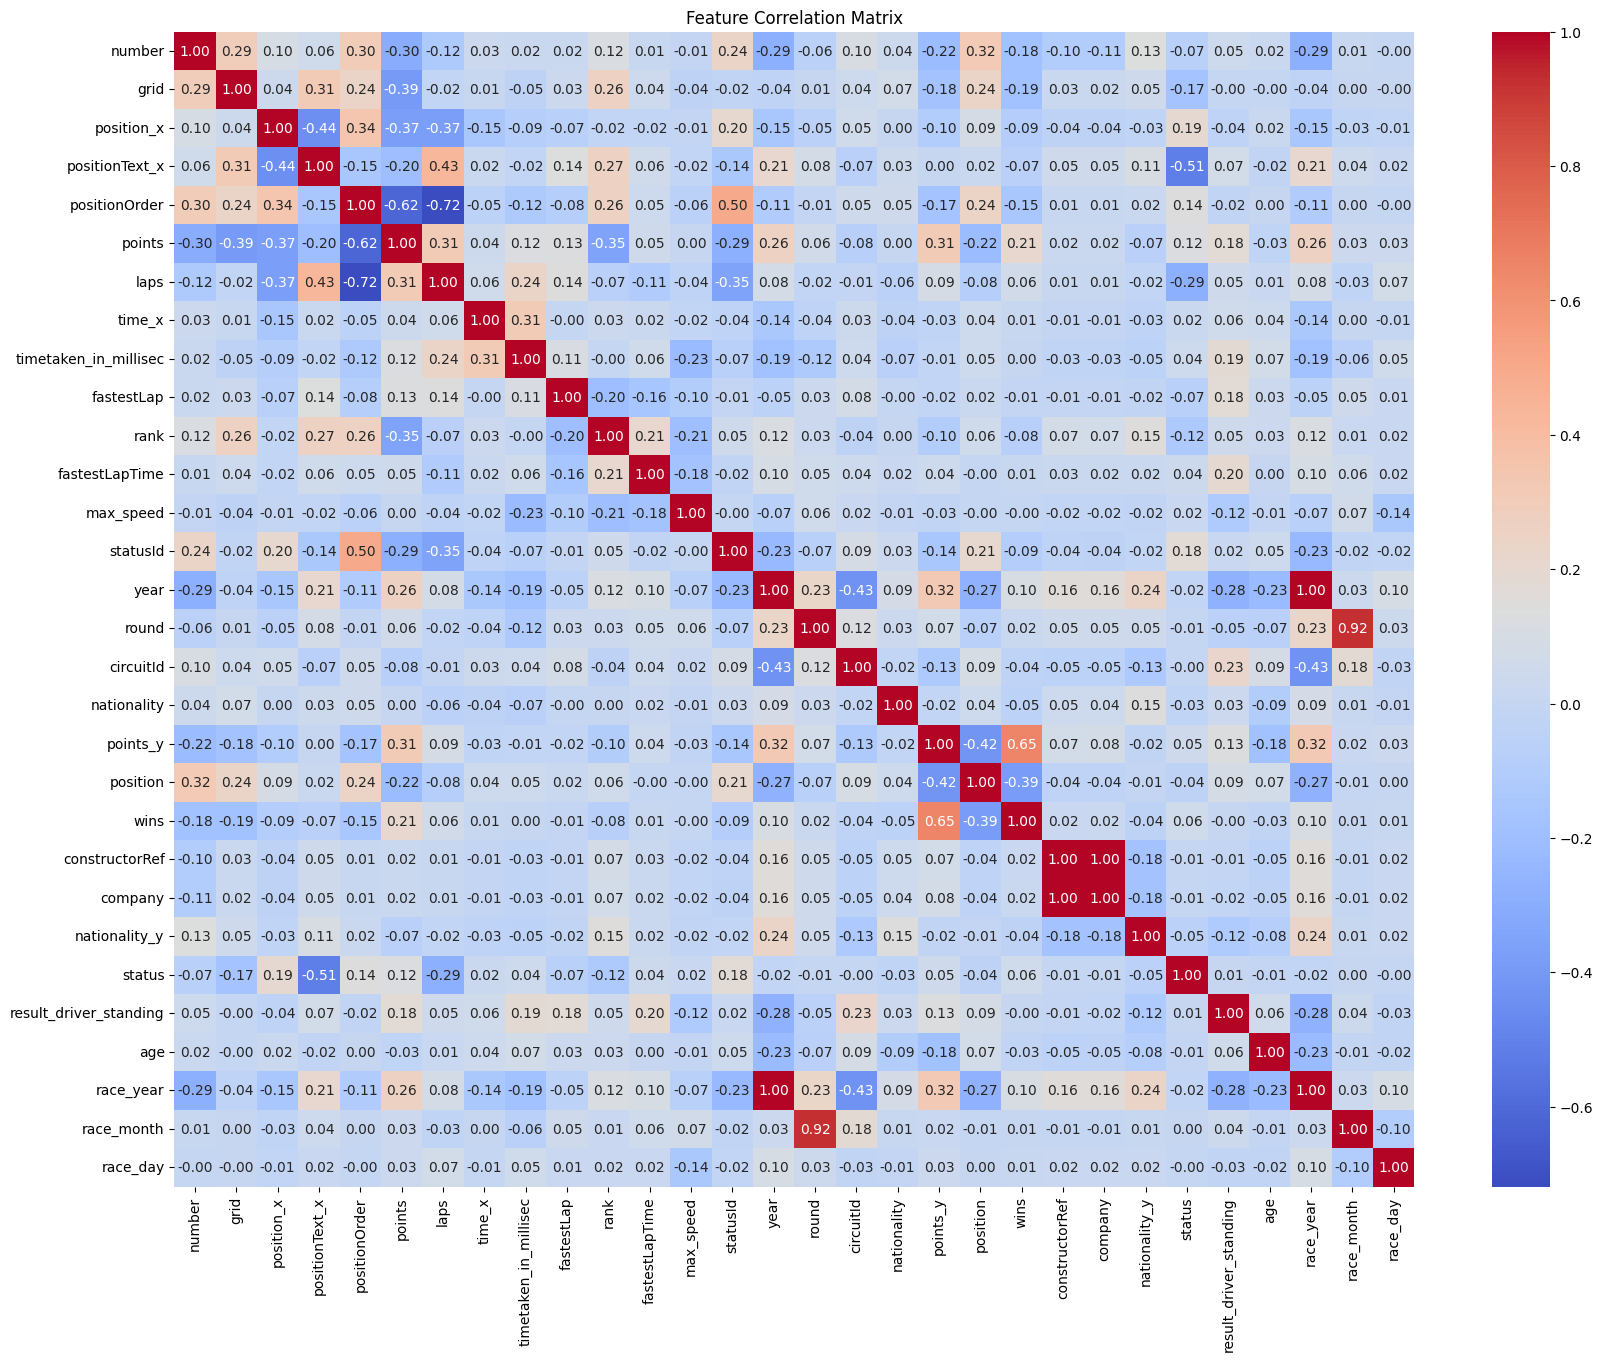

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = train_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()




In [60]:
numerical_cols = train_data.select_dtypes(include=[np.number]).columns

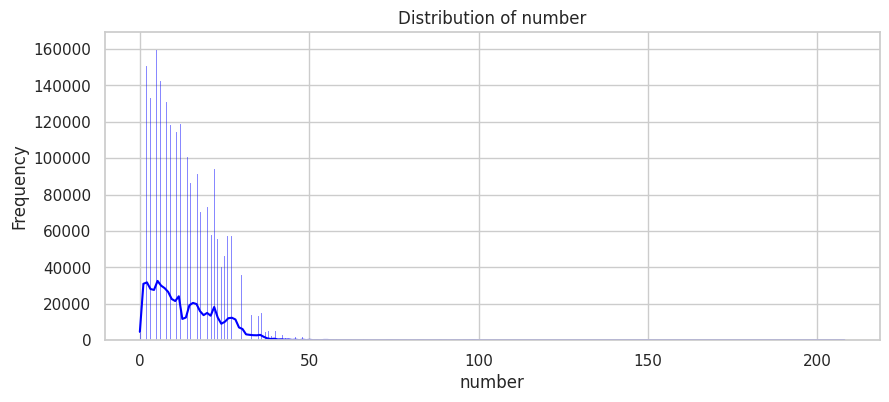

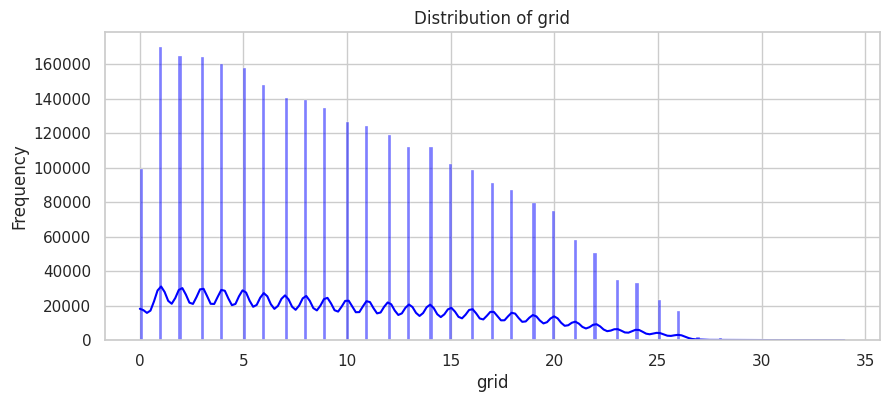

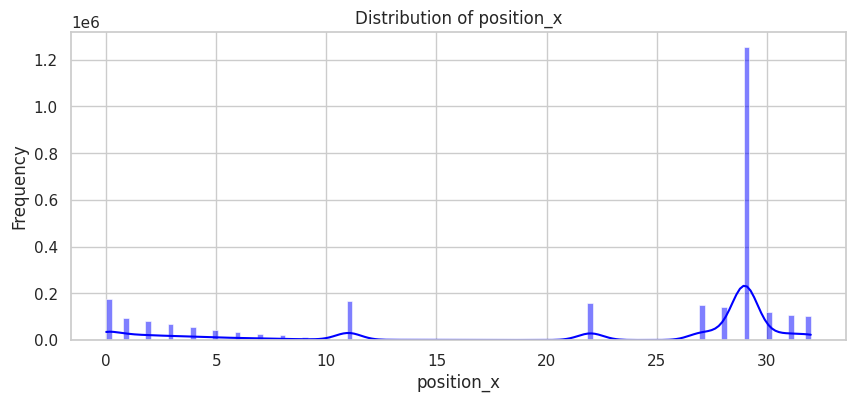

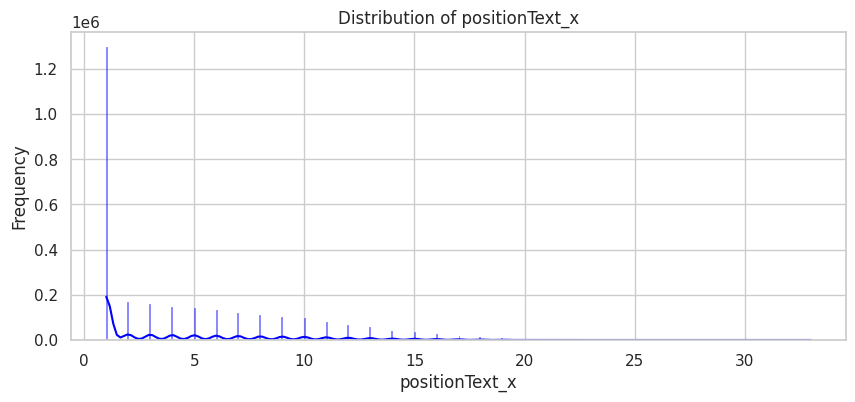

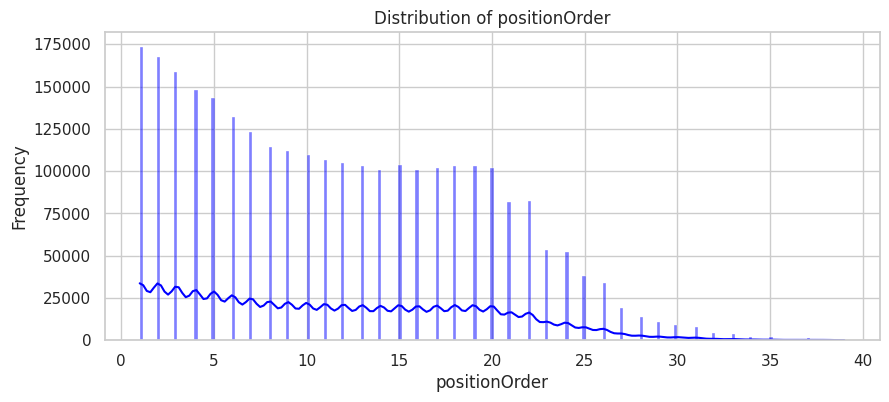

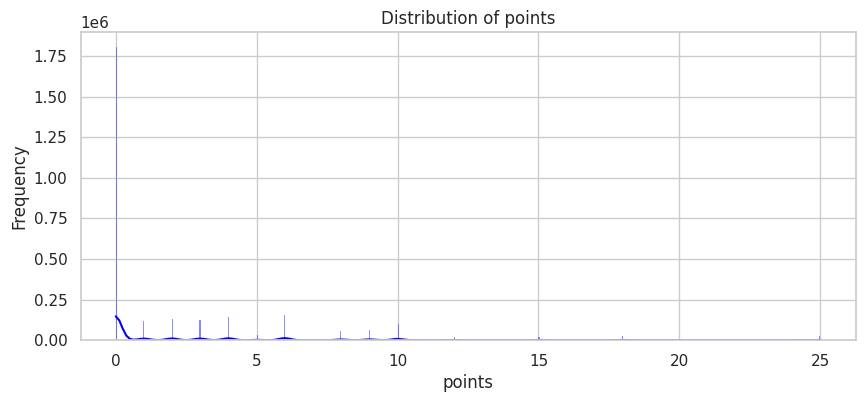

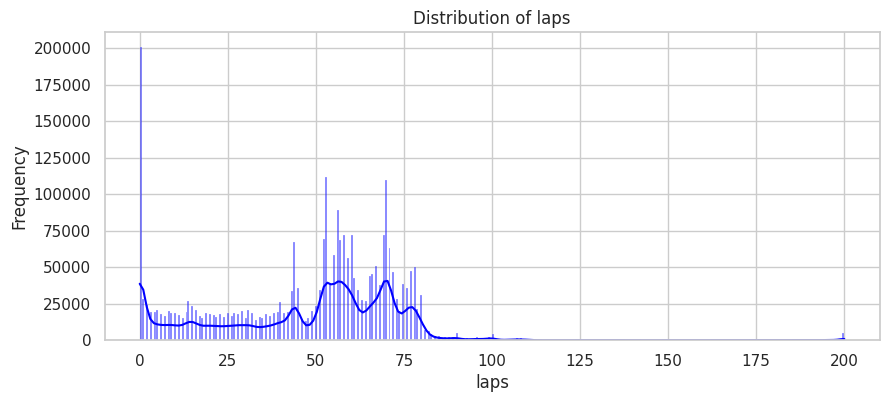

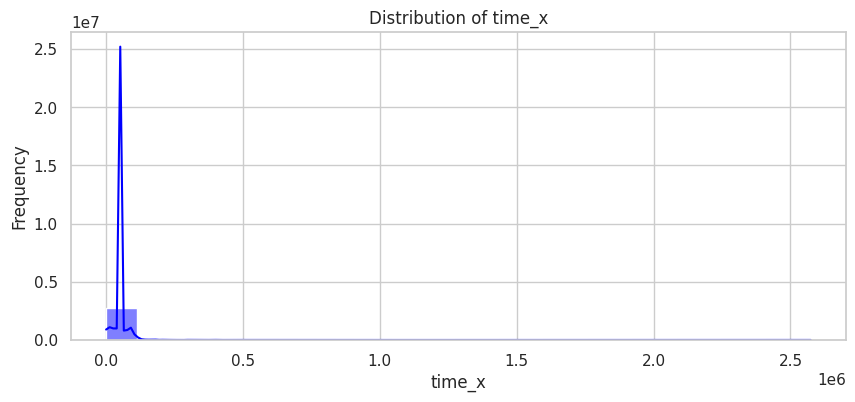

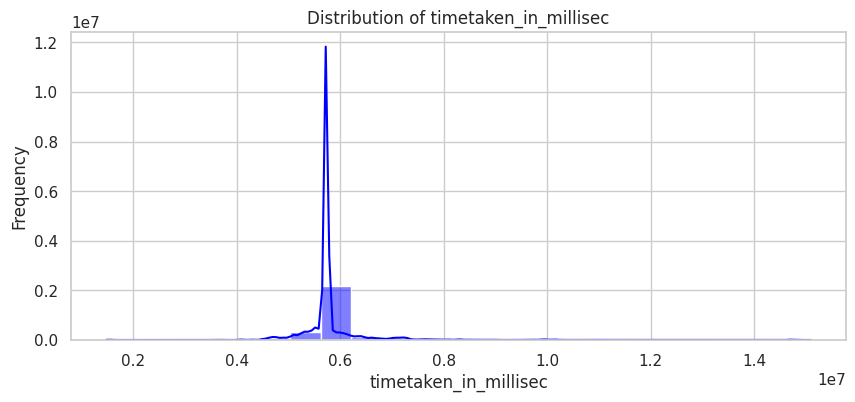

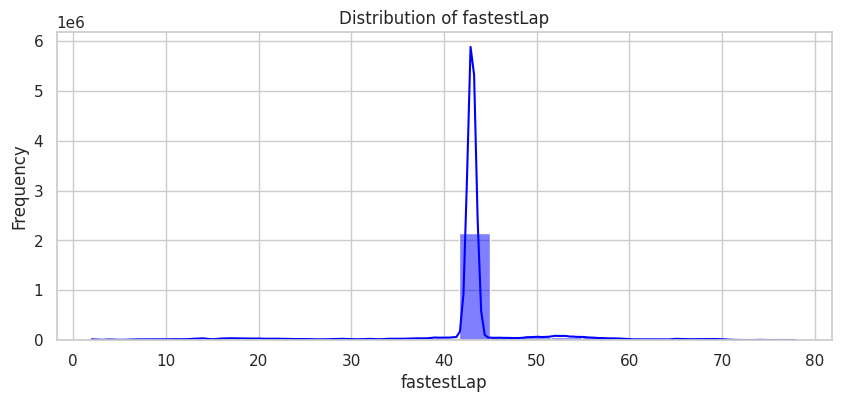

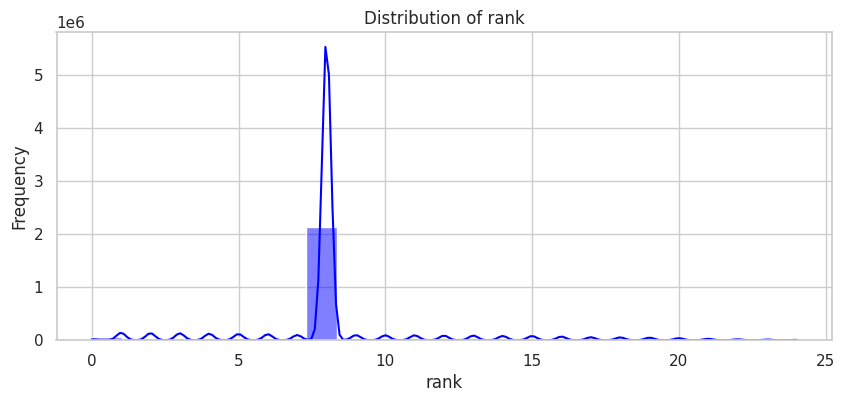

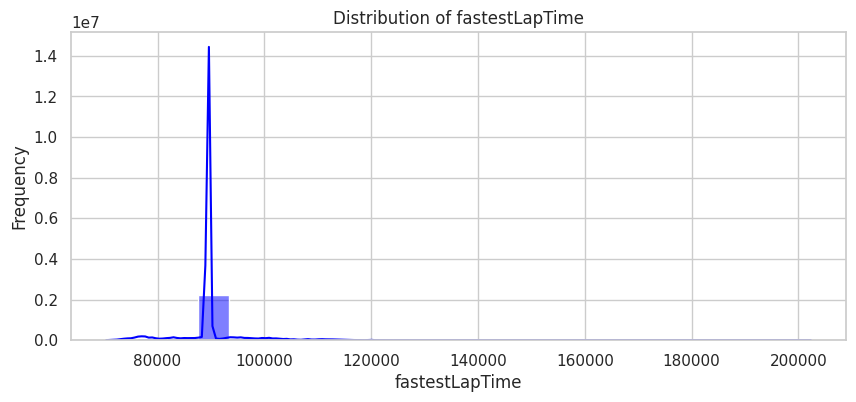

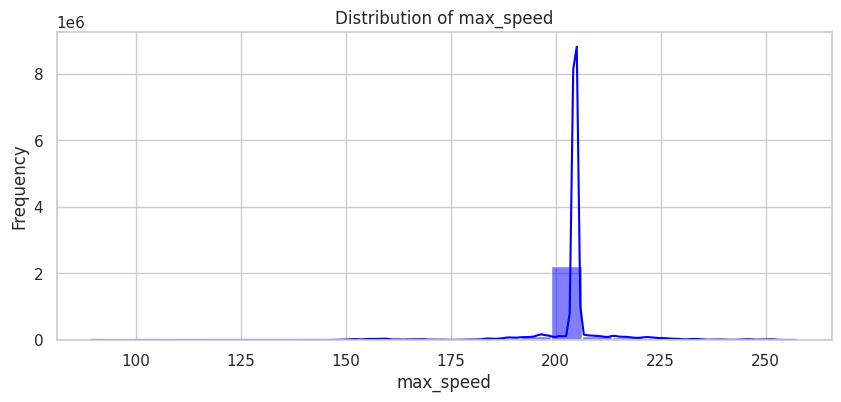

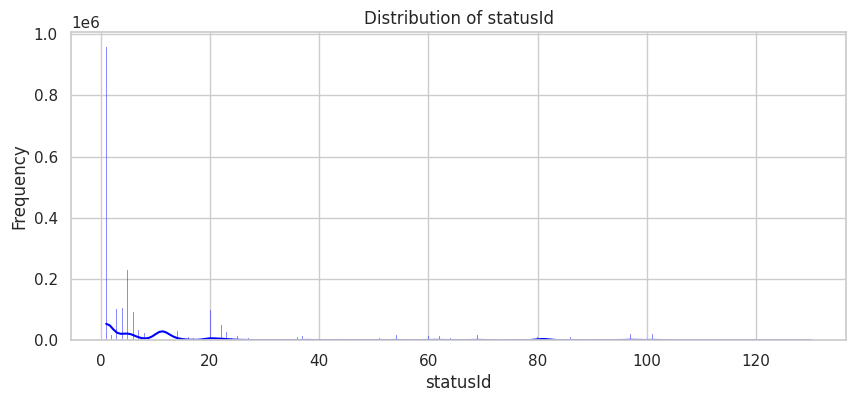

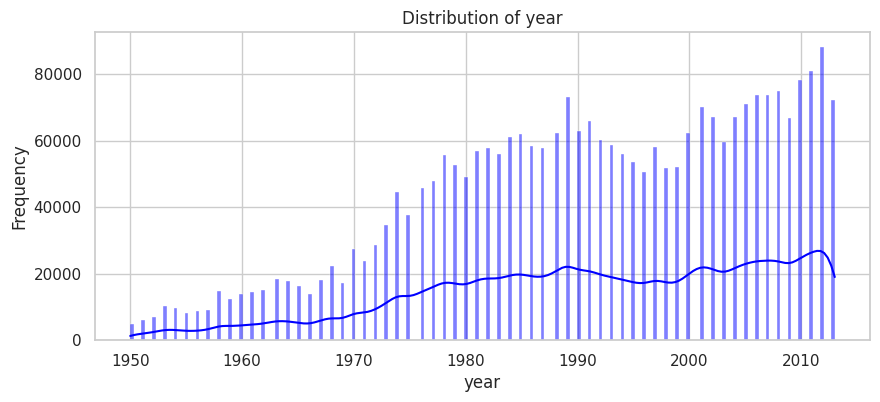

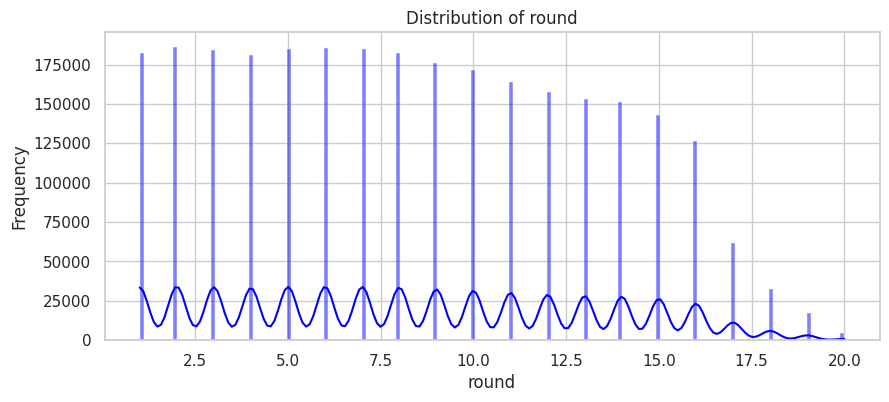

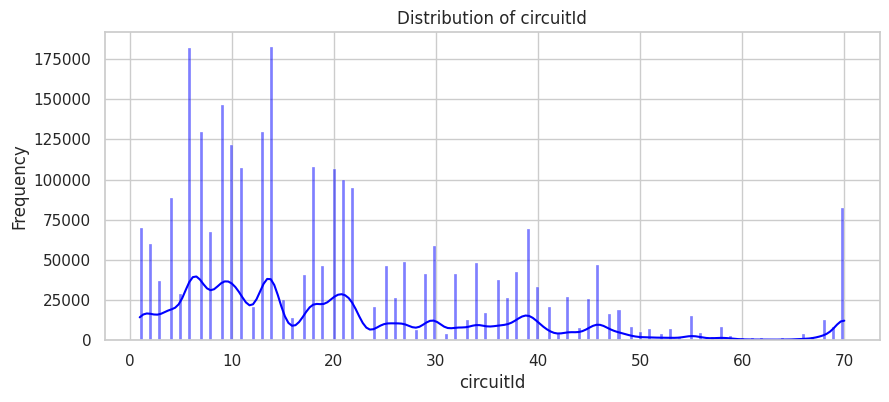

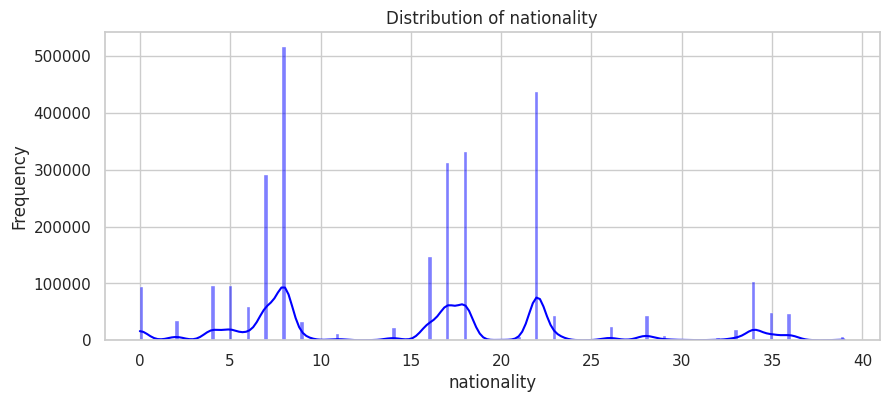

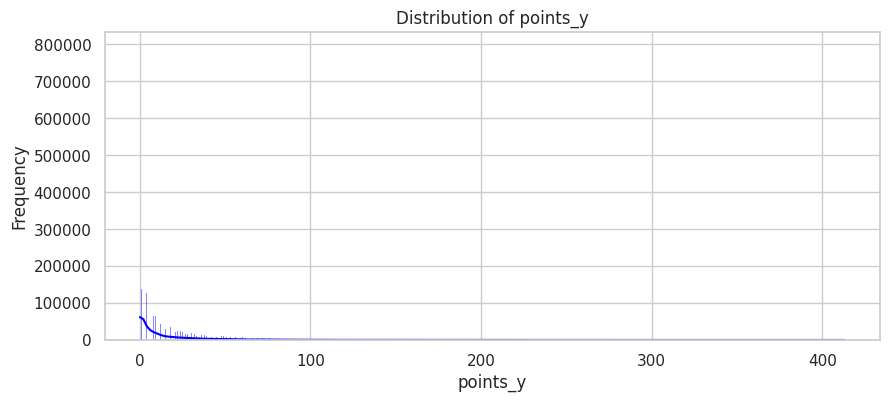

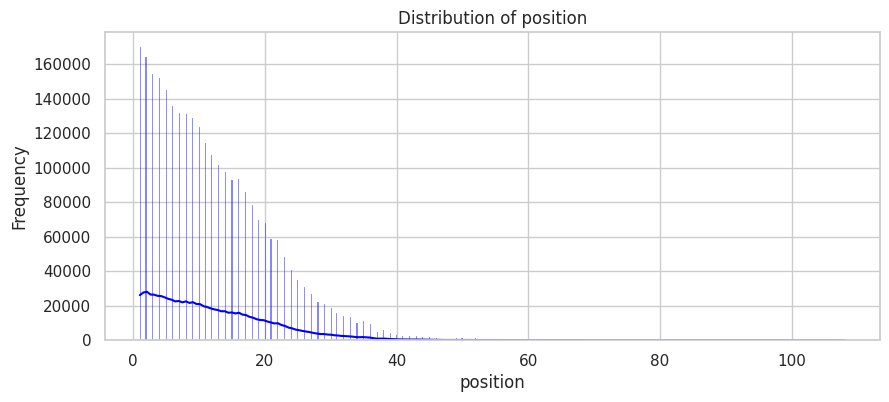

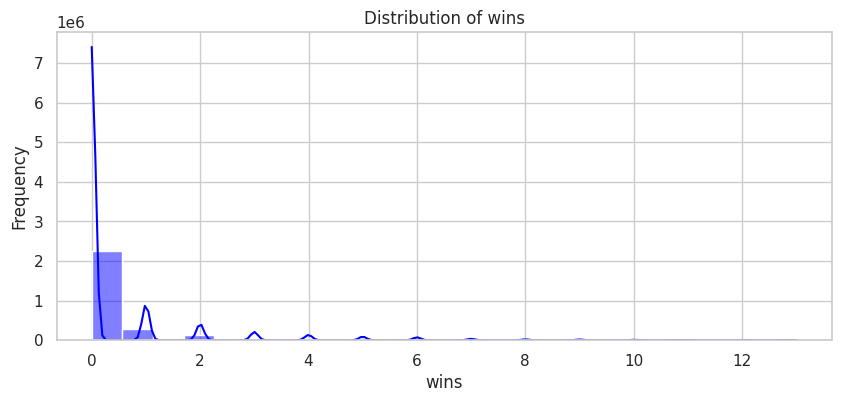

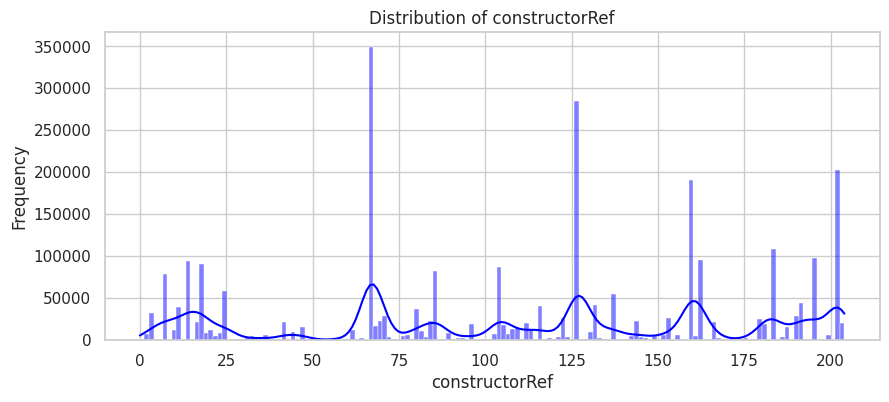

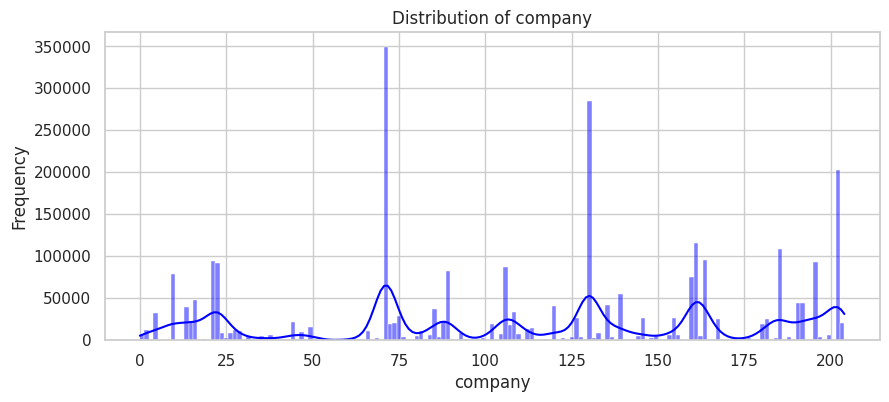

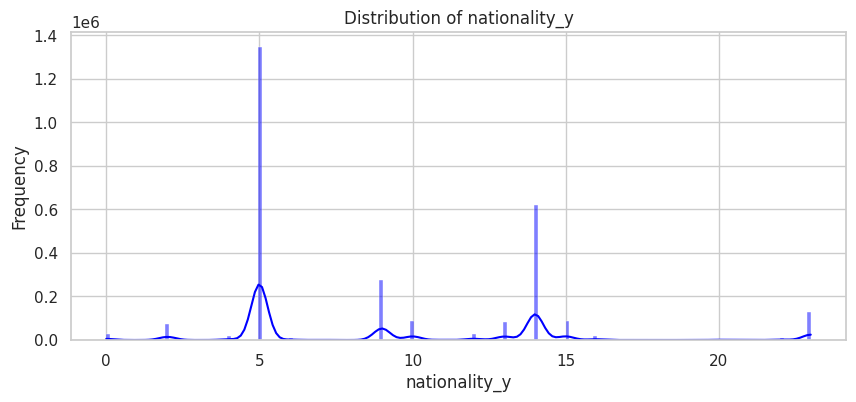

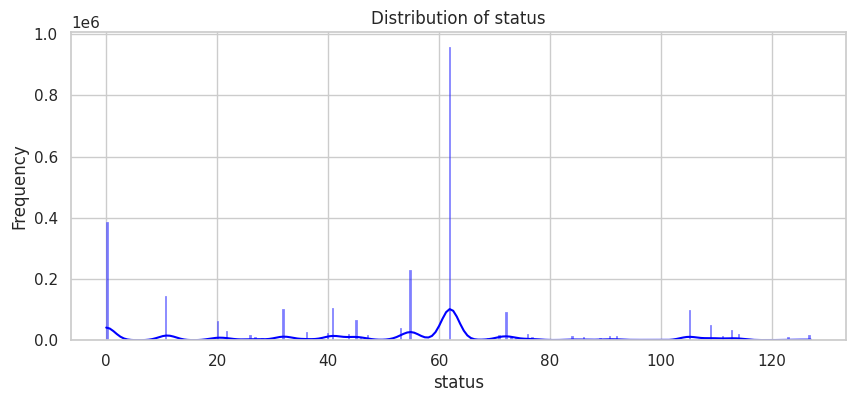

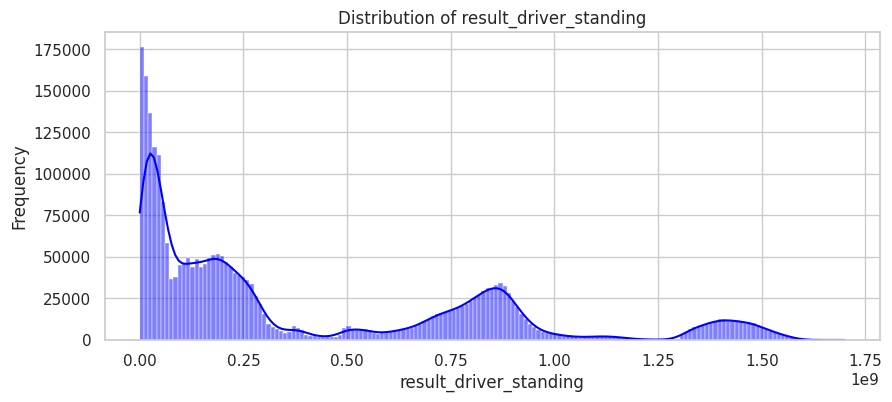

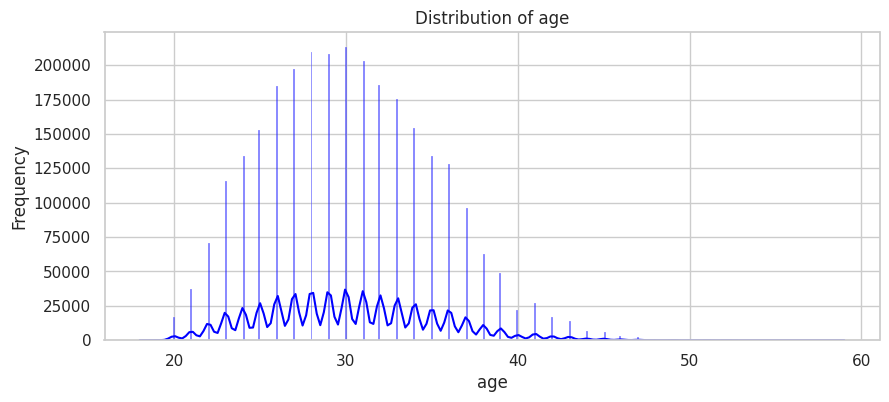

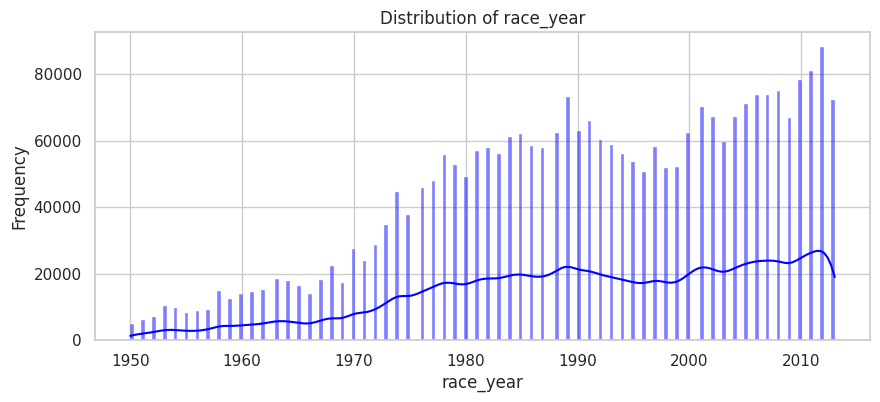

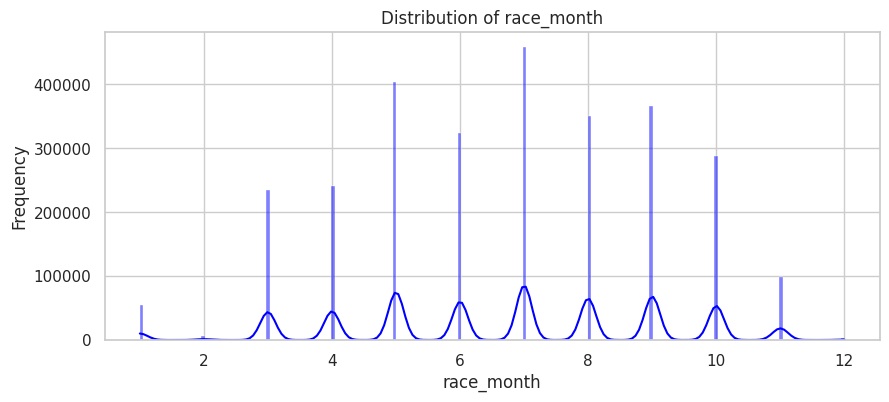

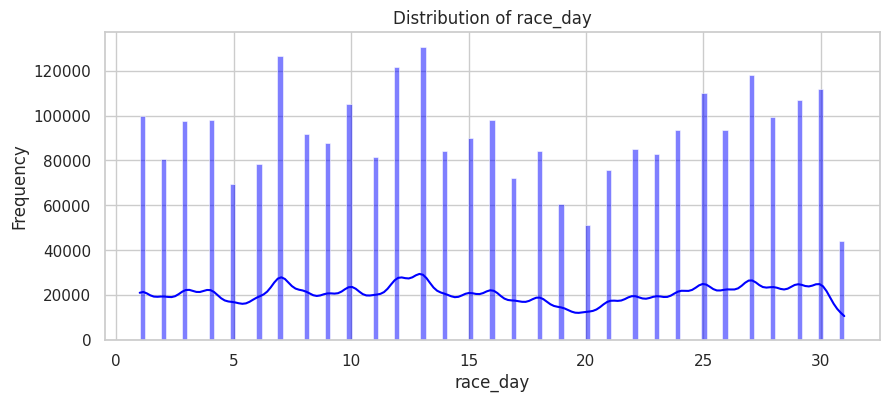

In [92]:
sns.set(style="whitegrid")

# Iterate through each column in the DataFrame
for column in train_data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 4))

    # Plotting the histogram with a kernel density estimate (KDE)
    sns.histplot(train_data[column], kde=True, color='blue')

    # Additional customization
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()

In [93]:

skewed_cols = train_data.skew().sort_values(ascending=False)  # This gives the skewness of each column
print(skewed_cols)  # This will help you identify which columns are skewed


time_x                    24.051828
timetaken_in_millisec      5.945525
points_y                   4.152423
wins                       3.948259
points                     2.723730
statusId                   2.528512
fastestLapTime             2.081317
position                   1.707539
rank                       1.579658
number                     1.474576
positionText_x             1.246395
circuitId                  1.207722
result_driver_standing     1.063855
nationality_y              0.897713
nationality                0.529873
grid                       0.434328
positionOrder              0.421773
age                        0.394927
round                      0.176490
laps                       0.086565
race_day                   0.035635
status                    -0.000126
constructorRef            -0.152963
race_month                -0.172554
company                   -0.187123
year                      -0.474515
race_year                 -0.474515
position_x                -1

In [94]:
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Function to add a small constant to handle zero values (for log and Box-Cox transformations)
def add_small_constant(x):
    return x + 0.01 if np.min(x) <= 0 else x


for col in skewed_cols.index:
    if (skewed_cols[col] > 1 or skewed_cols[col] < -1) and col != 'position':  # Assuming right skewness needs correction if skew > 1
        # Log Transformation
        train_data[f'log_{col}'] = np.log1p(add_small_constant(train_data[col]))

In [97]:
skewed_cols_test = test_data.skew().sort_values(ascending=False)  # This gives the skewness of each column
print(skewed_cols_test)

statusId                  4.742790
time_x                    3.997198
wins                      3.386169
points_y                  1.760569
number                    1.202102
points                    1.086564
circuitId                 0.797052
timetaken_in_millisec     0.787159
nationality_y             0.750119
nationality               0.483599
positionText_x            0.415717
age                       0.219460
positionOrder             0.214284
rank                      0.204110
grid                      0.199239
race_day                  0.180846
fastestLapTime            0.135909
round                     0.038945
race_year                 0.010209
year                      0.010209
position_x               -0.101037
race_month               -0.209021
status                   -0.328380
constructorRef           -0.601003
max_speed                -0.613113
company                  -0.638103
fastestLap               -0.957815
laps                     -1.599212
result_driver_standi

In [98]:
for col in skewed_cols.index:
    if (skewed_cols[col] > 1 or skewed_cols[col] < -1) and col != 'position':  # Assuming right skewness needs correction if skew > 1
        # Log Transformation
        test_data[f'log_{col}'] = np.log1p(add_small_constant(test_data[col]))


In [100]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352928 entries, 0 to 352927
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   number                      352928 non-null  int64  
 1   grid                        352928 non-null  int64  
 2   position_x                  352928 non-null  int64  
 3   positionText_x              352928 non-null  int64  
 4   positionOrder               352928 non-null  int64  
 5   points                      352928 non-null  float64
 6   laps                        352928 non-null  int64  
 7   time_x                      352928 non-null  float64
 8   timetaken_in_millisec       352928 non-null  float64
 9   fastestLap                  352928 non-null  float64
 10  rank                        352928 non-null  float64
 11  fastestLapTime              352928 non-null  float64
 12  max_speed                   352928 non-null  float64
 13  statusId      

In [102]:
test_data.columns

Index(['number', 'grid', 'position_x', 'positionText_x', 'positionOrder',
       'points', 'laps', 'time_x', 'timetaken_in_millisec', 'fastestLap',
       'rank', 'fastestLapTime', 'max_speed', 'statusId', 'year', 'round',
       'circuitId', 'nationality', 'points_y', 'wins', 'constructorRef',
       'company', 'nationality_y', 'status', 'result_driver_standing', 'age',
       'race_year', 'race_month', 'race_day', 'log_time_x',
       'log_timetaken_in_millisec', 'log_points_y', 'log_wins', 'log_points',
       'log_statusId', 'log_fastestLapTime', 'log_rank', 'log_number',
       'log_positionText_x', 'log_circuitId', 'log_result_driver_standing',
       'log_position_x', 'log_fastestLap', 'log_max_speed'],
      dtype='object')

In [118]:
train_columns = ['log_time_x', 'log_timetaken_in_millisec', 'log_points_y', 'log_wins',
       'log_points', 'log_statusId', 'log_fastestLapTime', 'log_rank',
       'log_number', 'log_positionText_x', 'log_circuitId',
        'log_position_x', 'log_fastestLap',
       'log_max_speed',
        'grid',   'positionOrder', 'laps',
        'year', 'round',
        'nationality', 'position',
       'constructorRef', 'company', 'nationality_y', 'status',
       'result_driver_standing', 'age', 'race_year', 'race_month', 'race_day']

test_columns = [ 'grid', 'positionOrder',
        'laps',
         'year', 'round',
        'nationality',  'constructorRef',
       'company', 'nationality_y', 'status', 'result_driver_standing', 'age',
       'race_year', 'race_month', 'race_day', 'log_time_x',
       'log_timetaken_in_millisec', 'log_points_y', 'log_wins', 'log_points',
       'log_statusId', 'log_fastestLapTime', 'log_rank', 'log_number',
       'log_positionText_x', 'log_circuitId',
       'log_position_x', 'log_fastestLap', 'log_max_speed']

In [119]:
test_data = test_data[test_columns]
train_data = train_data[train_columns]

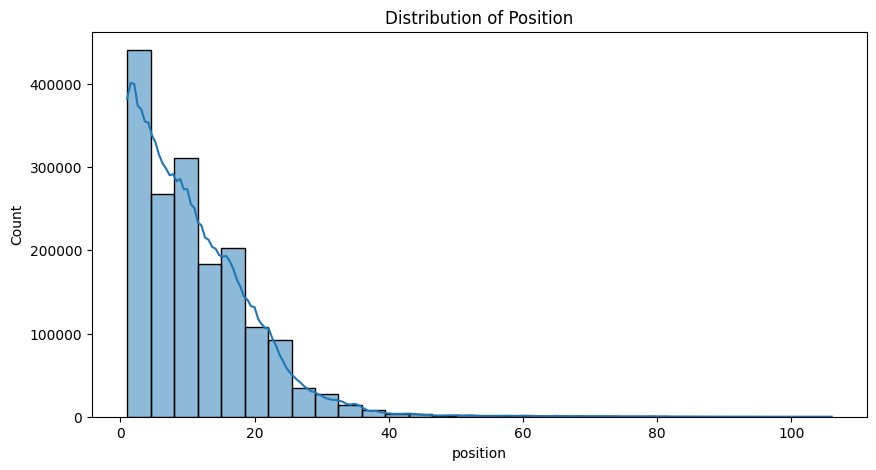

In [50]:
# Distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(train_data['position'], bins=30, kde=True)
plt.title('Distribution of Position')
plt.show()

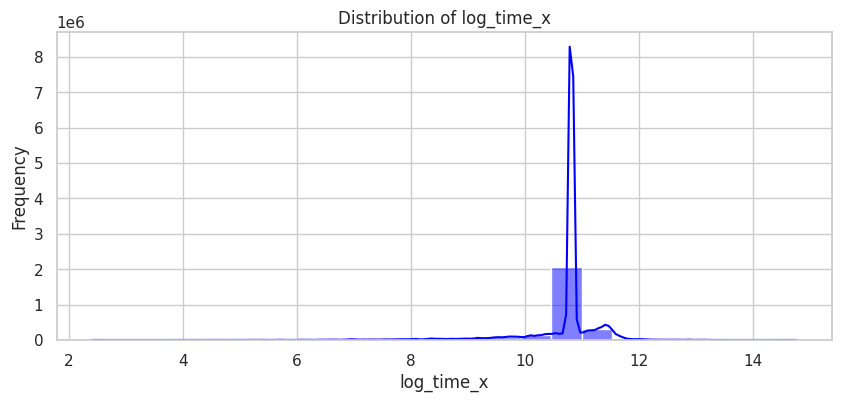

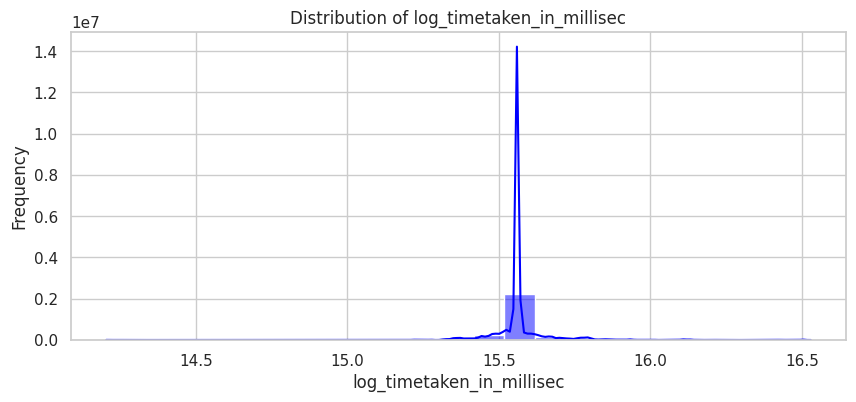

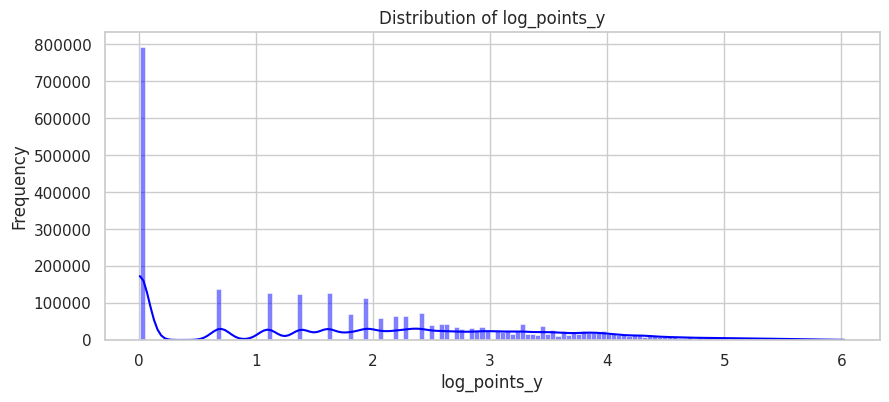

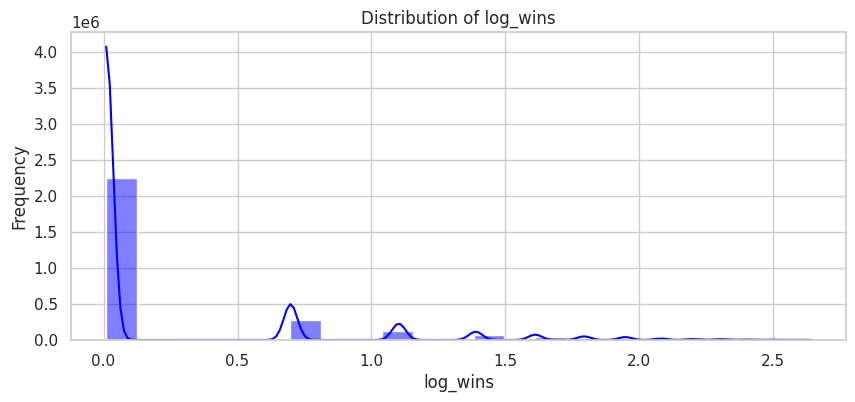

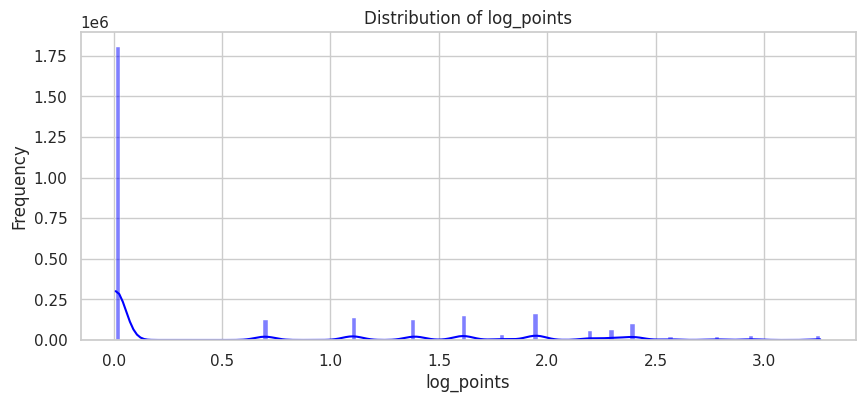

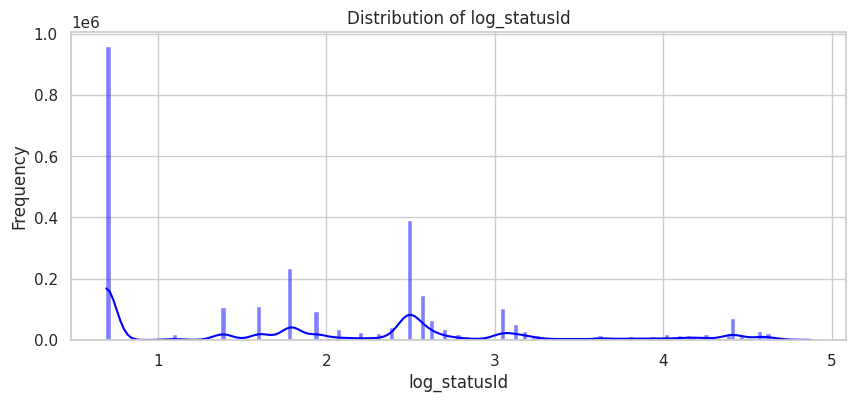

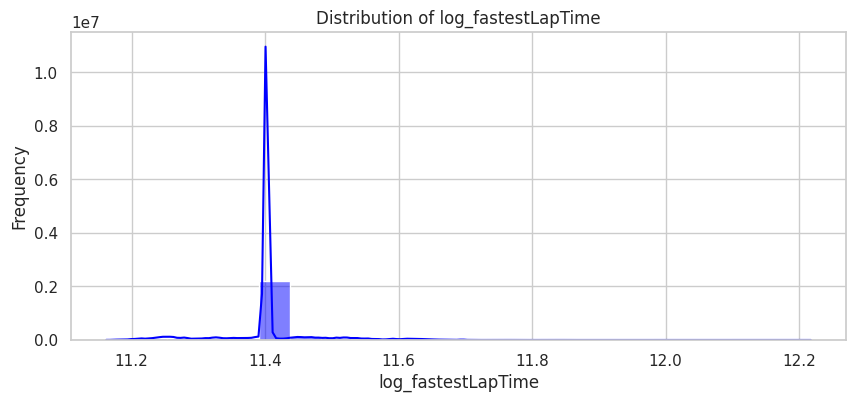

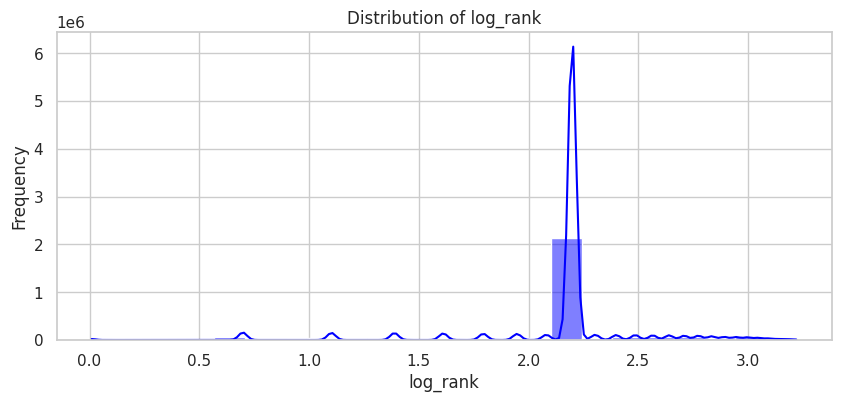

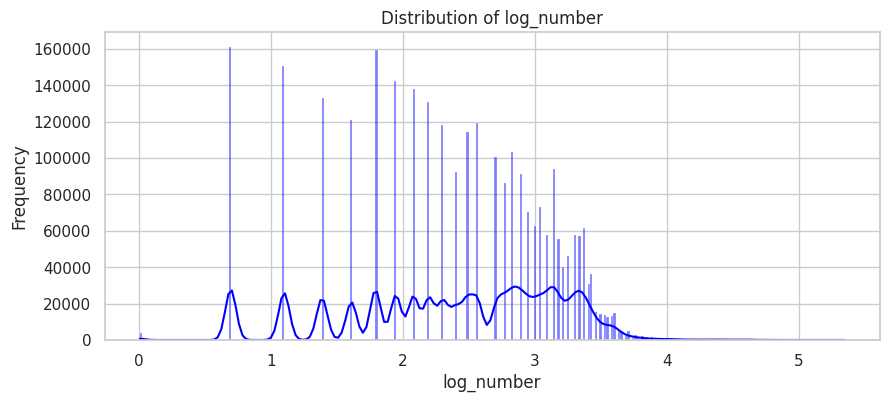

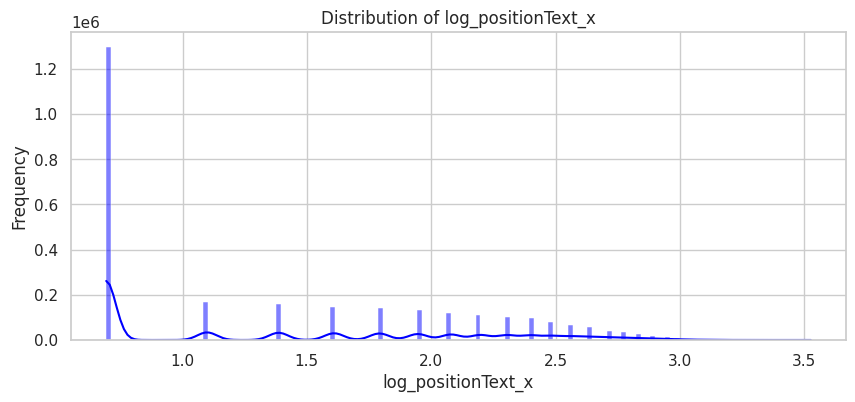

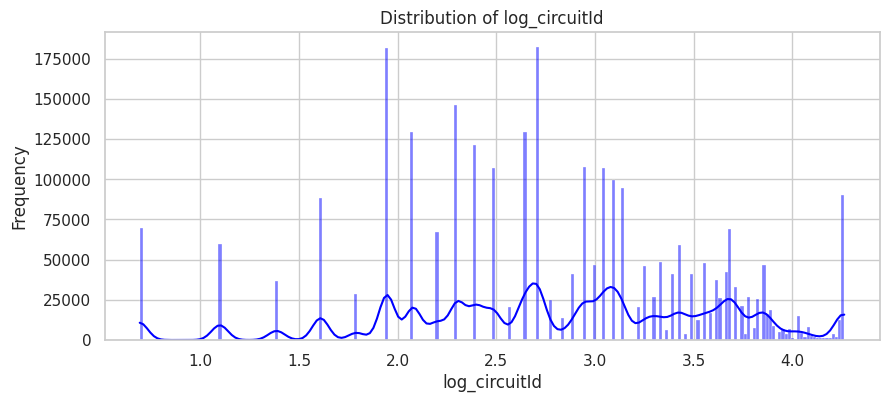

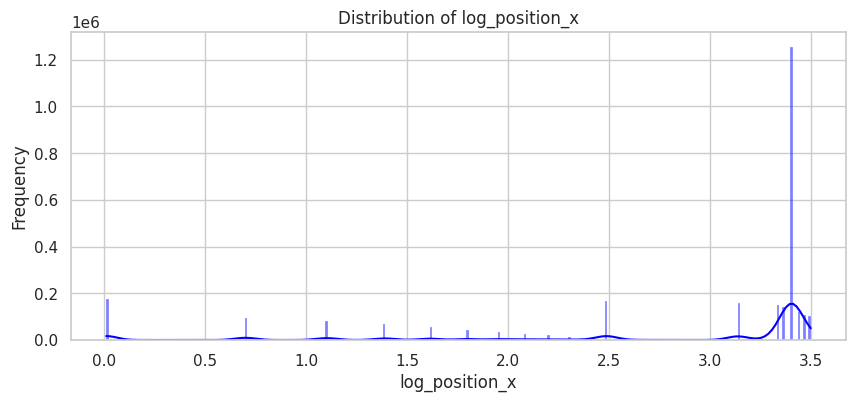

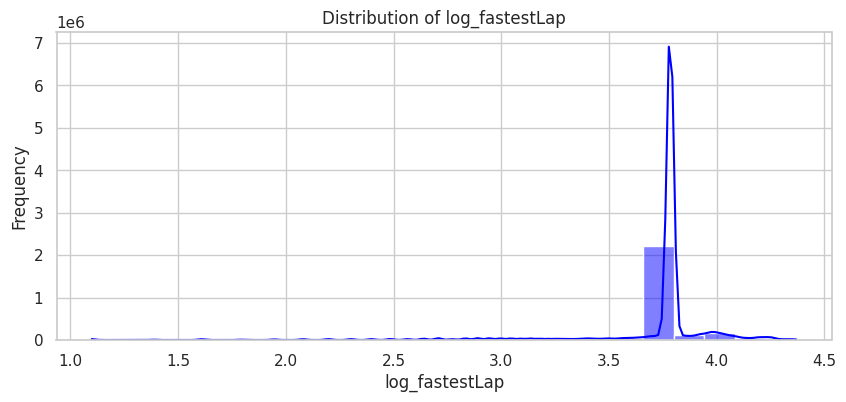

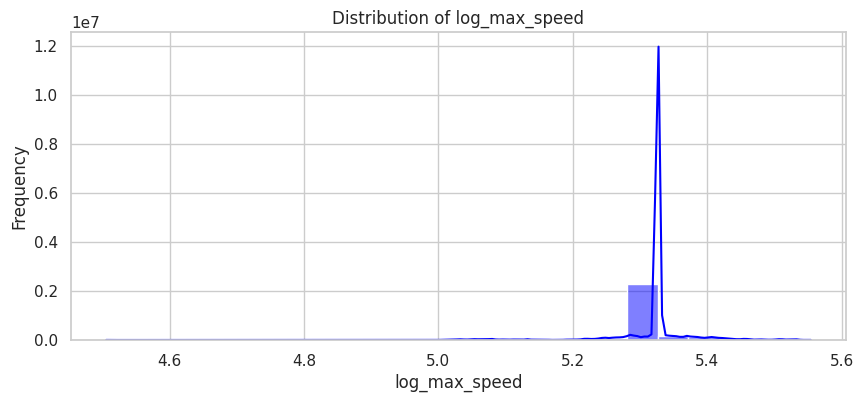

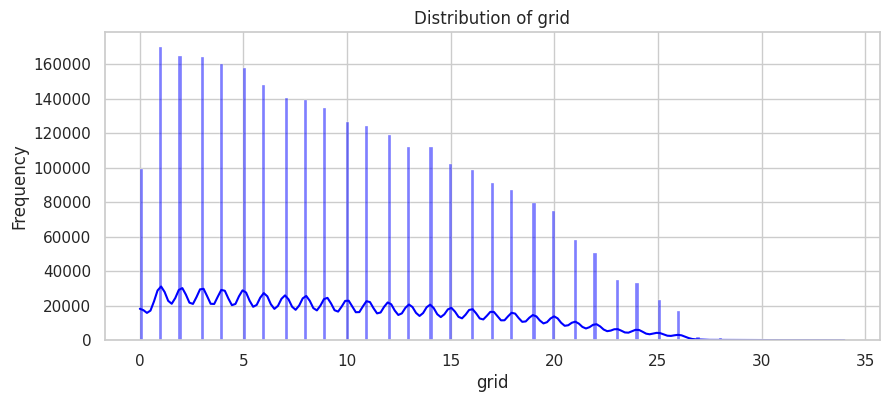

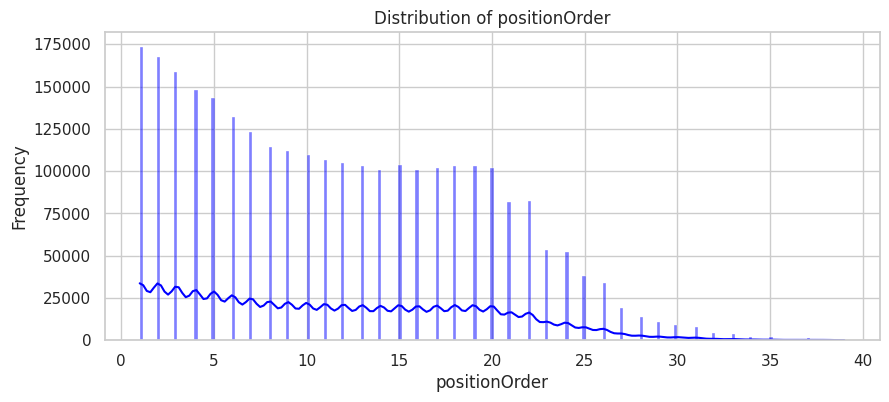

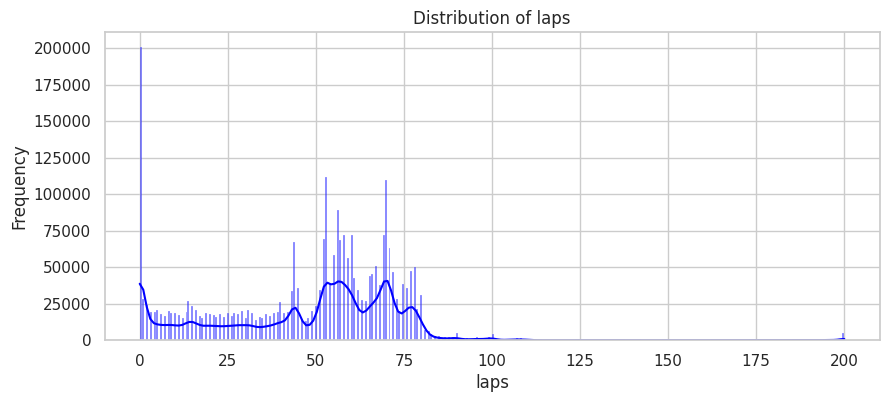

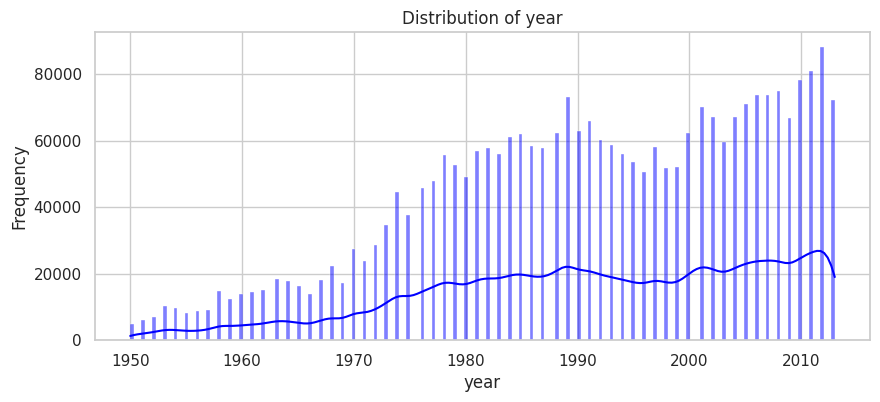

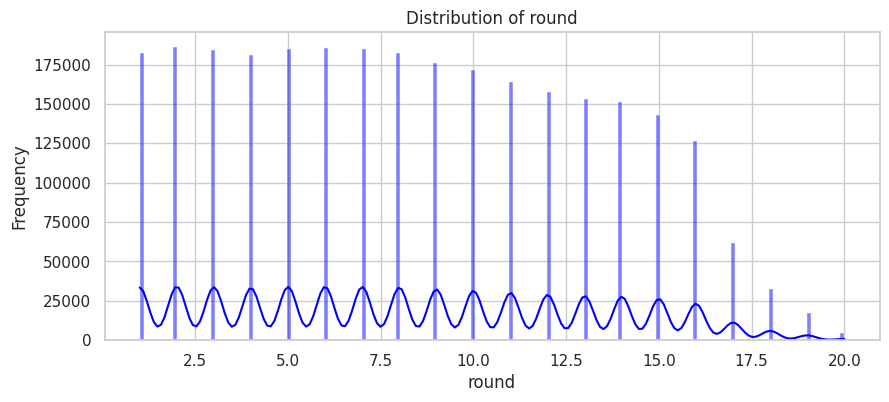

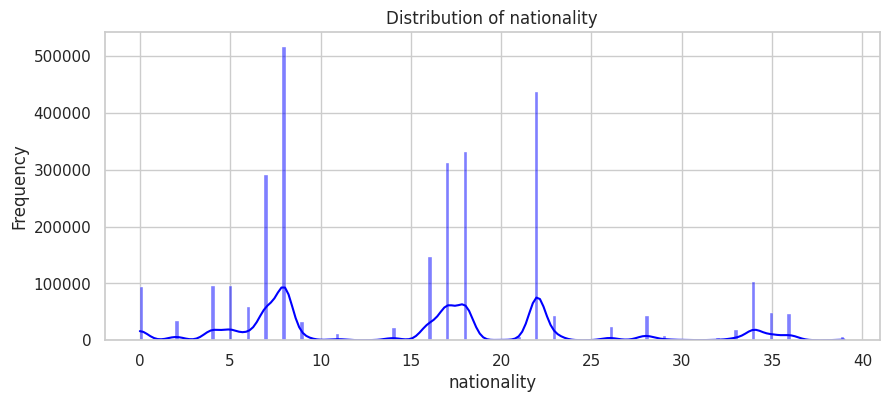

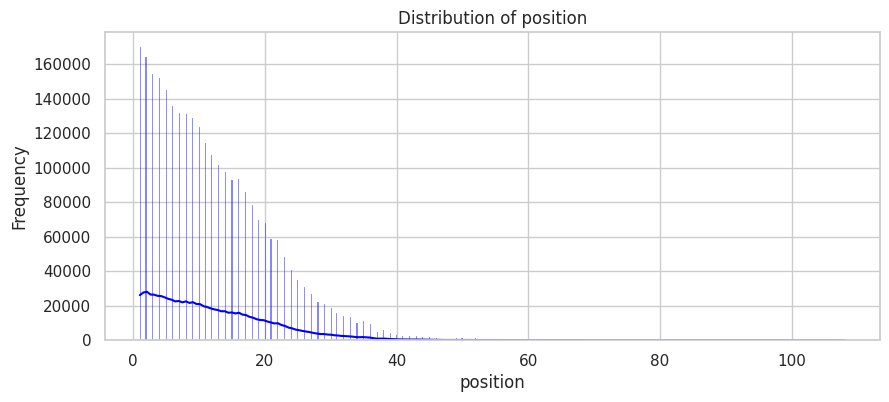

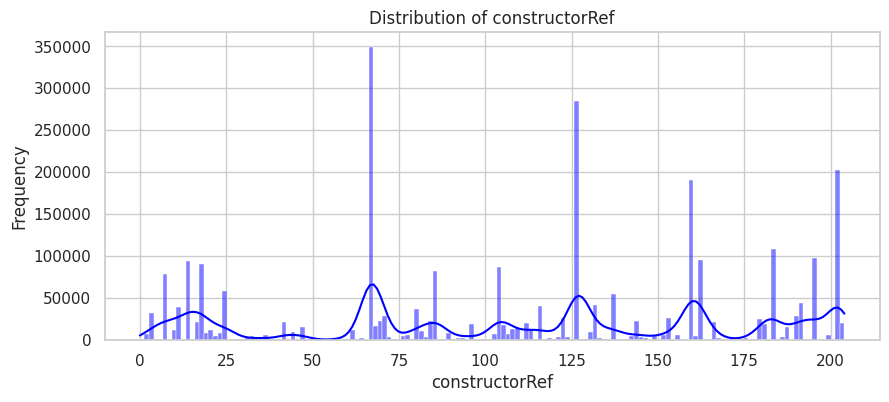

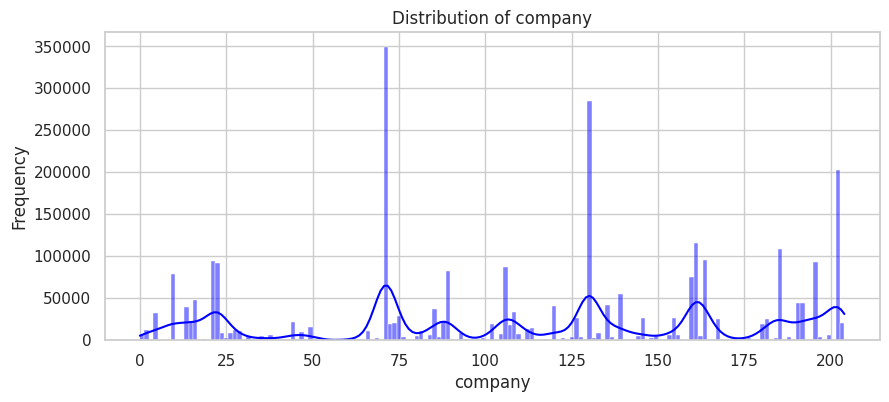

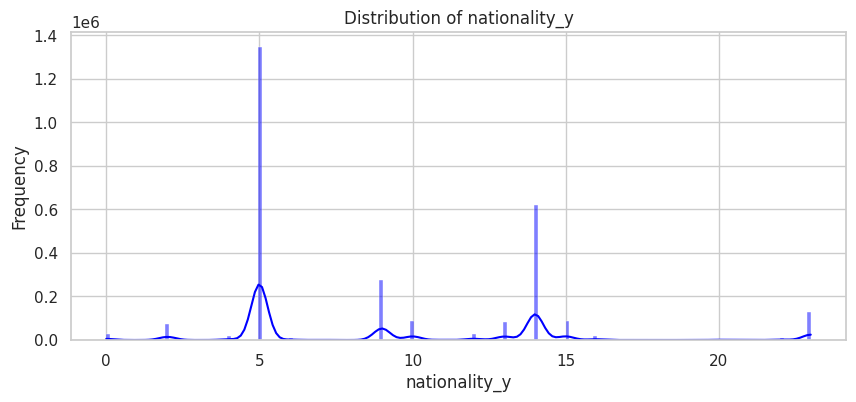

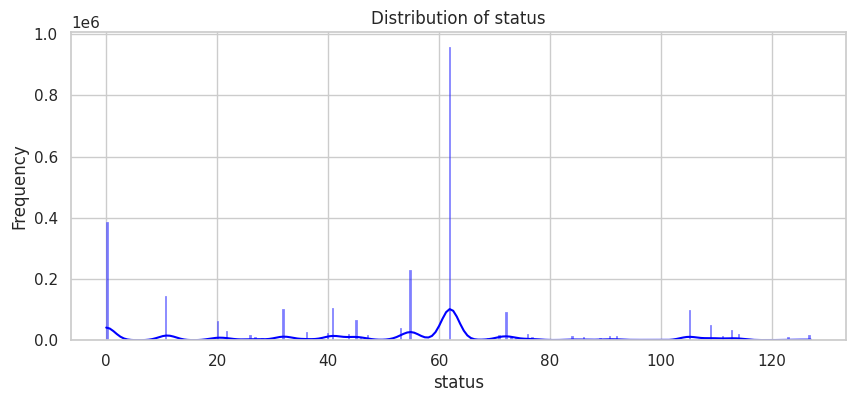

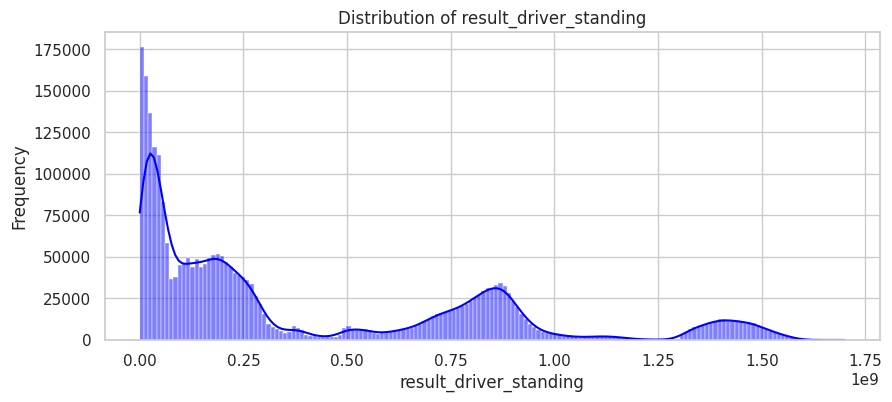

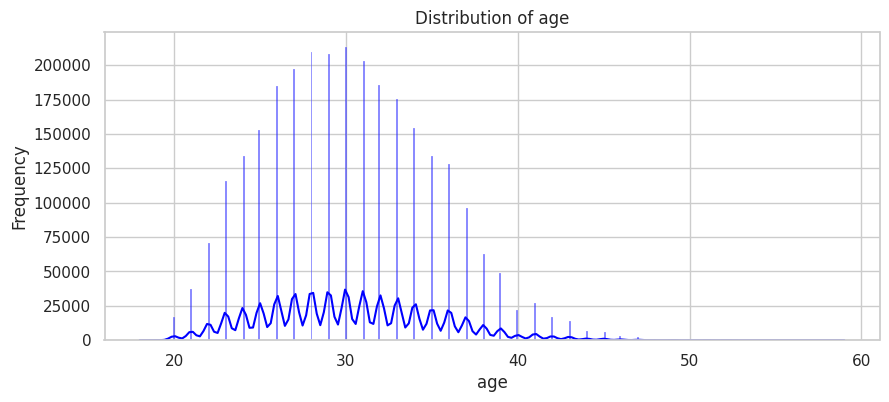

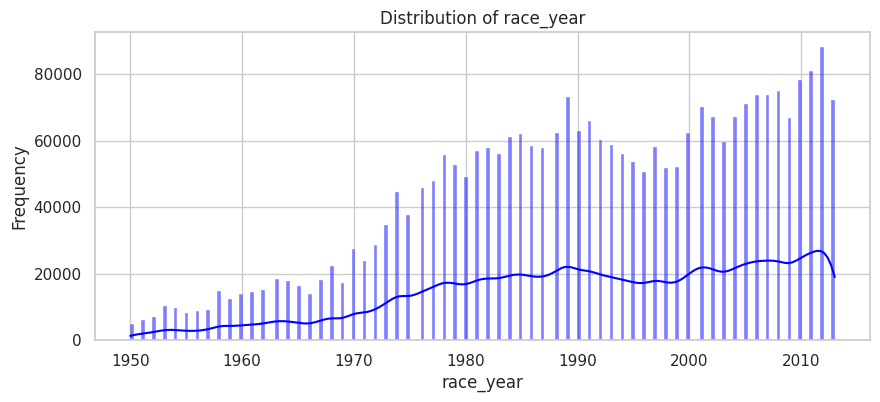

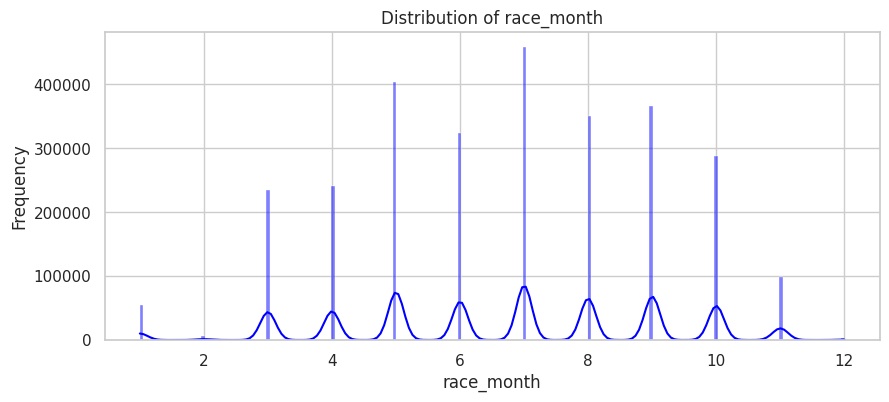

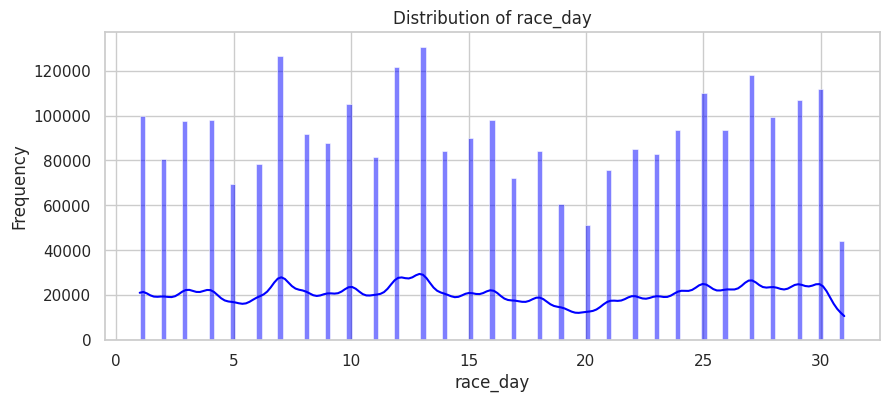

In [105]:
# Analyze how different features affect the target variable
sns.set(style="whitegrid")

# Iterate through each column in the DataFrame
for column in train_data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 4))

    # Plotting the histogram with a kernel density estimate (KDE)
    sns.histplot(train_data[column], kde=True, color='blue')

    # Additional customization
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Show the plot
    plt.show()


In [120]:
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
# Prepare the data

print(len(numeric_columns))

30


In [121]:
numeric_test = test_data.select_dtypes(include=[np.number]).columns
len(numeric_test)

29

In [71]:
train_data['number'] = train_data['number'].astype(int)
test_data['number'] = test_data['number'].astype(int)

In [114]:
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
numeric_test = test_data.select_dtypes(include=[np.number]).columns
len(numeric_test)

31

In [115]:
test_data.columns

Index(['grid', 'positionOrder', 'points', 'laps', 'time_x', 'year', 'round',
       'nationality', 'constructorRef', 'company', 'nationality_y', 'status',
       'result_driver_standing', 'age', 'race_year', 'race_month', 'race_day',
       'log_time_x', 'log_timetaken_in_millisec', 'log_points_y', 'log_wins',
       'log_points', 'log_statusId', 'log_fastestLapTime', 'log_rank',
       'log_number', 'log_positionText_x', 'log_circuitId', 'log_position_x',
       'log_fastestLap', 'log_max_speed'],
      dtype='object')

In [122]:
for i in numeric_columns:
    if i not in numeric_test:
        print(i)

position


In [123]:
for i in numeric_test:
    if i not in numeric_columns:
        print(i)

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns



In [124]:
# Prepare the data
X = train_data[numeric_columns].drop(columns=['position'],axis=1)
# X_test = test_data[numeric_columns]
y = train_data['position']

In [60]:
y

0           3
1           3
2           4
3           3
4           4
           ..
2830096     4
2830097     4
2830098     8
2830099    10
2830100     8
Name: position, Length: 1704744, dtype: int64

In [133]:

rf = RandomForestRegressor(n_estimators=25,max_depth = 20)
rf.fit(X, y)

RandomForestRegressor(max_depth=20, n_estimators=25)

In [135]:
importances = rf.feature_importances_
feature_names = numeric_columns.drop(['position'])
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importance_df.head(20))

                   feature  importance
2             log_points_y    0.701664
24  result_driver_standing    0.074869
26               race_year    0.041175
17                    year    0.039703
3                 log_wins    0.027707
19             nationality    0.027427
25                     age    0.021356
22           nationality_y    0.014760
8               log_number    0.012366
14                    grid    0.008026
21                 company    0.006512
20          constructorRef    0.006258
15           positionOrder    0.003425
18                   round    0.002597
16                    laps    0.001875
23                  status    0.001554
5             log_statusId    0.001517
28                race_day    0.001481
27              race_month    0.001431
10           log_circuitId    0.001149


In [136]:
# Select the top N important features (e.g., top 20)
top_features = feature_importance_df.head(20)['feature']

# Use only the top features for the final model
X_top = train_data[top_features]

In [137]:
top_features

2               log_points_y
24    result_driver_standing
26                 race_year
17                      year
3                   log_wins
19               nationality
25                       age
22             nationality_y
8                 log_number
14                      grid
21                   company
20            constructorRef
15             positionOrder
18                     round
16                      laps
23                    status
5               log_statusId
28                  race_day
27                race_month
10             log_circuitId
Name: feature, dtype: object

In [138]:
X_test_top = test_data[top_features]

In [ ]:

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Train the final RandomForest model
rf = RandomForestRegressor(n_estimators=50,max_depth = 35)
rf.fit(X_train, y_train)

In [141]:
# Predict and evaluate on validation set
y_val_pred = rf.predict(X_val)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f'Validation RMSE: {val_rmse}')


Validation RMSE: 2.7597411418107183


In [85]:
X_test_top = test_data[numeric_test]

In [86]:
# Assuming 'final_model' is your trained RandomForest model and 'X_test_top' is your prepared test set
predictions = rf.predict(X_test_top)


In [87]:
X_test_top.columns

Index(['number', 'grid', 'position_x', 'positionText_x', 'positionOrder',
       'points', 'laps', 'time_x', 'timetaken_in_millisec', 'fastestLap',
       'rank', 'fastestLapTime', 'max_speed', 'statusId', 'year', 'round',
       'circuitId', 'nationality', 'points_y', 'wins', 'constructorRef',
       'company', 'nationality_y', 'status', 'result_driver_standing', 'age',
       'race_year', 'race_month', 'race_day'],
      dtype='object')

In [88]:
predictions

array([8.2, 8.2, 8.2, ..., 7.4, 7.7, 9.1])

In [89]:
sub_df = pd.DataFrame({
    "position":predictions,
    "result_driver_standing":X_test_top['result_driver_standing']
})
sub_df

,position,result_driver_standing
0,8.2,298739826
1,8.2,299218806
2,8.2,299697786
3,4.8,300176766
4,5.1,300655746
...,...,...
352923,15.8,1880337225
352924,15.8,1881380625
352925,7.4,1881902325
352926,7.7,1882424025


In [91]:
sub_df.to_csv('/content/drive/MyDrive/f1nalyze-datathon-ieeecsmuj/submission.csv', index=False)

In [90]:
sub_df.shape

(352928, 2)